<a href="https://colab.research.google.com/github/FerdousJUST/fish-classification-cnn-four/blob/main/Fish_Classification_project_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [4]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical') 
test_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    
                                    tf.keras.layers.Conv2D(32,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 

                                    tf.keras.layers.Conv2D(64,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 

                                    tf.keras.layers.Conv2D(128,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(256,padding='same',dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),                                  

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [9]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])

In [10]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [11]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part four/my_model_four.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [13]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-13-da3407ffa4b4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=10, validation_data=test_fed,
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
150/150 - 1591s - loss: 3.8061 - accuracy: 0.5294 - val_loss: 0.7584 - val_accuracy: 0.6967 - lr: 1.0000e-04 - 1591s/epoch - 11s/step
Epoch 2/10
150/150 - 153s - loss: 0.6373 - accuracy: 0.7513 - val_loss: 0.6546 - val_accuracy: 0.7242 - lr: 1.0000e-04 - 153s/epoch - 1s/step
Epoch 3/10
150/150 - 153s - loss: 0.4882 - accuracy: 0.8177 - val_loss: 0.4765 - val_accuracy: 0.8225 - lr: 1.0000e-04 - 153s/epoch - 1s/step
Epoch 4/10
150/150 - 153s - loss: 0.3748 - accuracy: 0.8592 - val_loss: 0.3790 - val_accuracy: 0.8608 - lr: 1.0000e-04 - 153s/epoch - 1s/step
Epoch 5/10
150/150 - 151s - loss: 0.3078 - accuracy: 0.8842 - val_loss: 0.2873 - val_accuracy: 0.9008 - lr: 1.0000e-04 - 151s/epoch - 1s/step
Epoch 6/10
150/150 - 152s - loss: 0.2475 - accuracy: 0.9092 - val_loss: 0.2049 - val_accuracy: 0.9233 - lr: 1.0000e-04 - 152s/epoch - 1s/step
Epoch 7/10
150/150 - 154s - loss: 0.1921 - accuracy: 0.9319 - val_loss: 0.2210 - val_accuracy: 0.9100 - lr: 1.0000e-04 - 154s/epoch - 1s/step
Epo

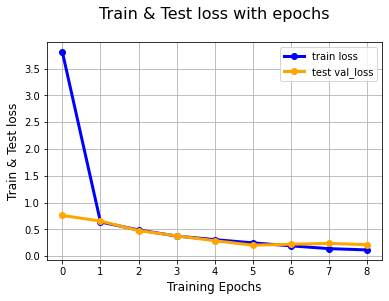

In [41]:
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train loss', 'test val_loss'], loc='upper right')
plt.title("Train & Test loss with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test loss",fontsize =12)
plt.show()

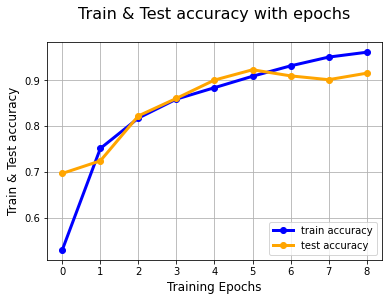

In [42]:
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['train accuracy', 'test accuracy'], loc='lower right')
plt.title("Train & Test accuracy with epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 12)
plt.ylabel("Train & Test accuracy",fontsize =12)
plt.show()

In [21]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


38/38 - 16s - loss: 0.2049 - accuracy: 0.9233 - 16s/epoch - 416ms/step
92.33
